Projet P5 - Segmentation client d'un site E-commerce - modélisation

# Modélisation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pickle
from joblib import dump, load




# Chargement des bases

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    RFM = pd.read_csv("/content/drive/MyDrive/Notebooks/P5 Git/RFM.csv")

except ModuleNotFoundError :
    RFM = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5 Git\RFM.csv')

# Détermination du nombre optimal de cluster avec Kelbowvisualizer


In [ ]:
RFM[['payment_value','order_count','Recence']].shape

(96558, 3)

In [ ]:
X= RFM[['payment_value','order_count','Recence']]

In [ ]:
X.shape

(96558, 3)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96558 entries, 0 to 96557
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_value  96558 non-null  float64
 1   order_count    96558 non-null  int64  
 2   Recence        96558 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.2 MB


In [ ]:
X.isna().sum()

payment_value    0
order_count      0
Recence          0
dtype: int64

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['payment_value',
                                                   'order_count',
                                                   'Recence'])])),
                ('kelbowvisualizer',
                 KElbowVisualizer(ax=<AxesSubplot:>,
                                  estimator=KMeans(n_clusters=10,
                                                   random_state=22)))])

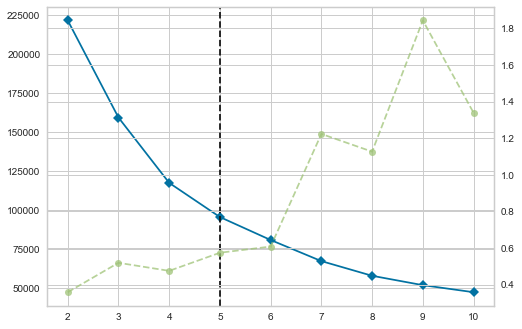

In [ ]:
debut = time.time() 

scaler = StandardScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])
debut = time.time()
kmeans_visualizer.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['payment_value',
                                                   'order_count',
                                                   'Recence'])])),
                ('kelbowvisualizer',
                 KElbowVisualizer(ax=<AxesSubplot:>,
                                  estimator=KMeans(n_clusters=10,
                                                   random_state=22)))])

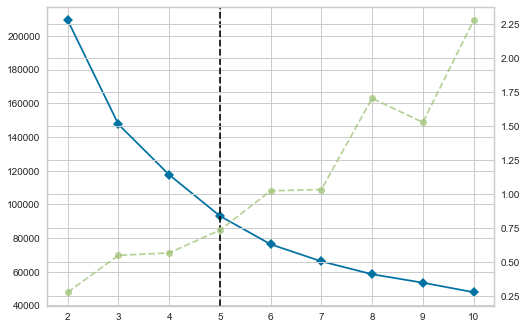

In [ ]:
debut = time.time() 

scaler = RobustScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])
debut = time.time()
kmeans_visualizer.fit(X)

In [ ]:
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['payment_value',
                                                   'order_count',
                                                   'Recence'])])),
                ('kelbowvisualizer',
                 KElbowVisualizer(ax=<AxesSubplot:>,
                                  estimator=KMeans(n_clusters=10,
                                                   random_state=22)))])

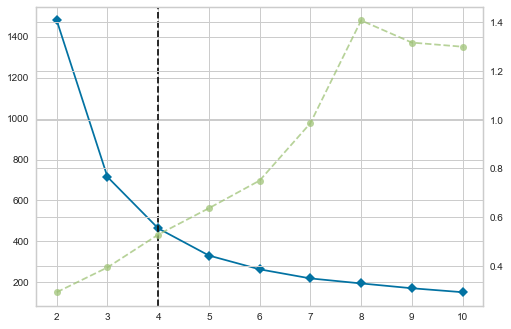

In [ ]:
scaler = MinMaxScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])

kmeans_visualizer.fit(X)

In [ ]:
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

# Détermination du meilleure Silhouette scaler * nb cluster 

In [ ]:
debut = time.time()
for scale_methode in [StandardScaler(), MinMaxScaler(),RobustScaler()] : 
    preprocessor = ColumnTransformer([('scaler', scale_methode, numerical_features)])

    for cluster in [4,5] :
        kmeans = Pipeline([
        ("preprocessor", preprocessor),
        ("Kmeans", KMeans(n_clusters=cluster, random_state=22).fit(X))])
        y_kmeans = kmeans.fit_predict(X)
        print(scale_methode,'nb cluster',cluster,"Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans))
        print ( time.time() - debut ,' secondes')  
print ( time.time() - debut ,' secondes')

StandardScaler() nb cluster 4 Silhouette Coefficient: 0.342
145.5414161682129  secondes
StandardScaler() nb cluster 5 Silhouette Coefficient: 0.321
281.11717319488525  secondes
MinMaxScaler() nb cluster 4 Silhouette Coefficient: 0.215
412.3087511062622  secondes
MinMaxScaler() nb cluster 5 Silhouette Coefficient: 0.181
544.9122426509857  secondes
RobustScaler() nb cluster 4 Silhouette Coefficient: 0.329
699.6803252696991  secondes
RobustScaler() nb cluster 5 Silhouette Coefficient: 0.450
829.2529380321503  secondes
829.2529380321503  secondes


Résultat : le meilleur score Silhouette est StandardScaler 4 clusters 
StandardScaler() nb cluster 4 Silhouette Coefficient: 0.342
StandardScaler() nb cluster 5 Silhouette Coefficient: 0.321
MinMaxScaler() nb cluster 4 Silhouette Coefficient: 0.215
MinMaxScaler() nb cluster 5 Silhouette Coefficient: 0.181



# Visualisation des clusters et analyse KMeans

In [ ]:
preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])

debut = time.time()
kmeans= Pipeline([
    ("preprocessor", preprocessor),
    ("Kmeans", KMeans(n_clusters=4, random_state=22).fit(X))])

print ( time.time() - debut ,' secondes')

0.6234393119812012  secondes


In [ ]:
debut = time.time()
y_kmeans = kmeans.fit_predict(X)
print ( time.time() - debut ,' secondes')
y_kmeans

0.5575056076049805  secondes


array([0, 0, 2, ..., 2, 0, 2])

In [ ]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans))

Silhouette Coefficient: 0.342


In [ ]:
# Visualisation Silhouette 

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=22))

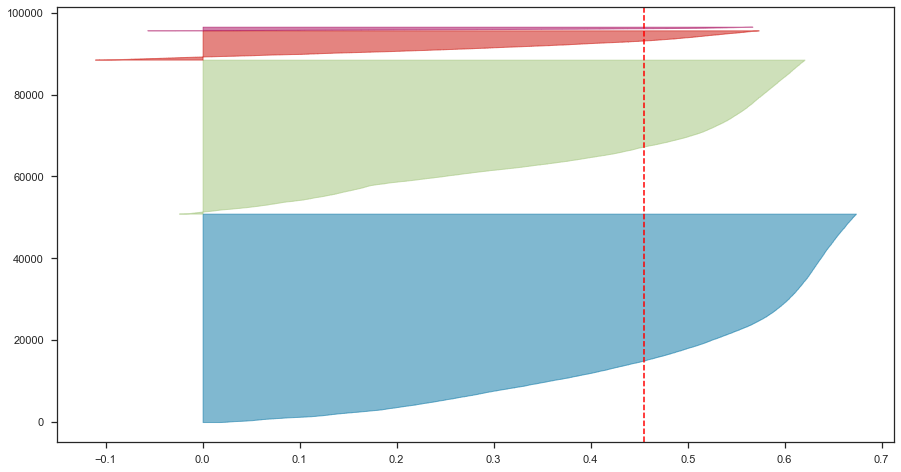

In [ ]:


fig, ax = plt.subplots(figsize=(15,8))
km = KMeans(n_clusters=4 , random_state=22)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
RFM[['Recence','payment_value','order_count']].shape

(96558, 3)

In [ ]:
RFM_ML=RFM[['Recence','payment_value','order_count']]


In [ ]:
RFM_ML['cluster']=y_kmeans

C:\Users\Hugues\AppData\Local\Temp\ipykernel_10448\3629948165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_ML['cluster']=y_kmeans


In [ ]:
RFM_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96558 entries, 0 to 96557
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recence        96558 non-null  float64
 1   payment_value  96558 non-null  float64
 2   order_count    96558 non-null  int64  
 3   cluster        96558 non-null  int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 2.6 MB


In [ ]:
RFM_ML.groupby(['cluster']).sum()

,Recence,payment_value,order_count
cluster,,,
0,8.513196e+07,6819340.08,50520
1,4.339778e+06,2910729.09,2622
2,7.284837e+07,5032220.39,37464
3,1.095725e+07,1760916.85,13781


In [ ]:
RFM_ML.groupby(['cluster']).describe(include='all').transpose() 

cluster                         0             1             2            3
Recence       count  50520.000000   2422.000000  37464.000000  6152.000000
              mean    1685.113977   1791.815701   1944.489882  1781.087631
              std       72.232431    148.900282     96.063301   145.625603
              min     1558.053289   1558.807745   1814.691252  1558.331125
              25%     1622.311978   1668.611021   1856.007615  1664.494539
              50%     1684.900037   1775.759840   1931.223937  1758.581055
              75%     1746.666368   1898.734007   2018.768338  1882.227566
              max     1815.245453   2250.024690   2252.280303  2249.175940
payment_value count  50520.000000   2422.000000  37464.000000  6152.000000
              mean     134.982979   1201.787403    134.321492   286.234859
              std      108.647049    687.583436    110.171594   208.778364
              min        9.590000    654.410000     10.070000    35.940000
              25%       61.180000    811.770000     61.010000   146.607500
              50%      103.680000    994.160000    101.340000   224.630000
              75%      170.522500   1351.510000    167.200000   358.720000
              max      703.060000  13664.080000    784.800000  1760.750000
order_count   count  50520.000000   2422.000000  37464.000000  6152.000000
              mean       1.000000      1.082576      1.000000     2.240085
              std        0.000000      0.309217      0.000000     0.943226
              min        1.000000      1.000000      1.000000     2.000000
              25%        1.000000      1.000000      1.000000     2.000000
              50%        1.000000      1.000000      1.000000     2.000000
              75%        1.000000      1.000000      1.000000     2.000000
              max        1.000000      4.000000      1.000000    15.000000

<AxesSubplot:xlabel='order_count', ylabel='payment_value'>

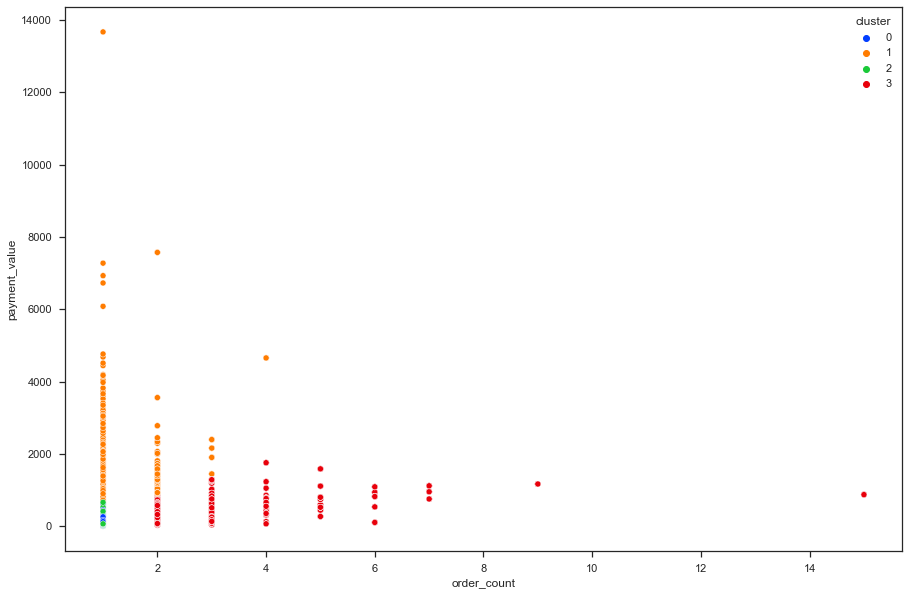

In [ ]:
#palette = sns.color_palette(["#0000FF","#FF7F00","#FF0000","#00FF00"])
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
sns.scatterplot(data=RFM_ML, x='order_count', y='payment_value', hue= 'cluster',palette= 'bright')

<AxesSubplot:xlabel='Recence', ylabel='payment_value'>

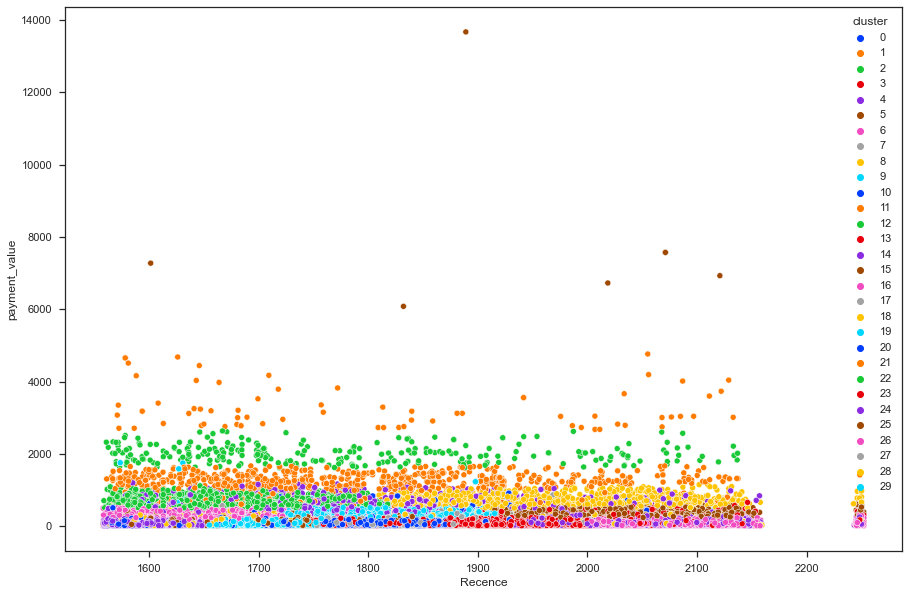

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
sns.scatterplot( data=RFM_ML, x='Recence', y='payment_value',hue= 'cluster',palette= 'bright')

<AxesSubplot:xlabel='Recence', ylabel='order_count'>

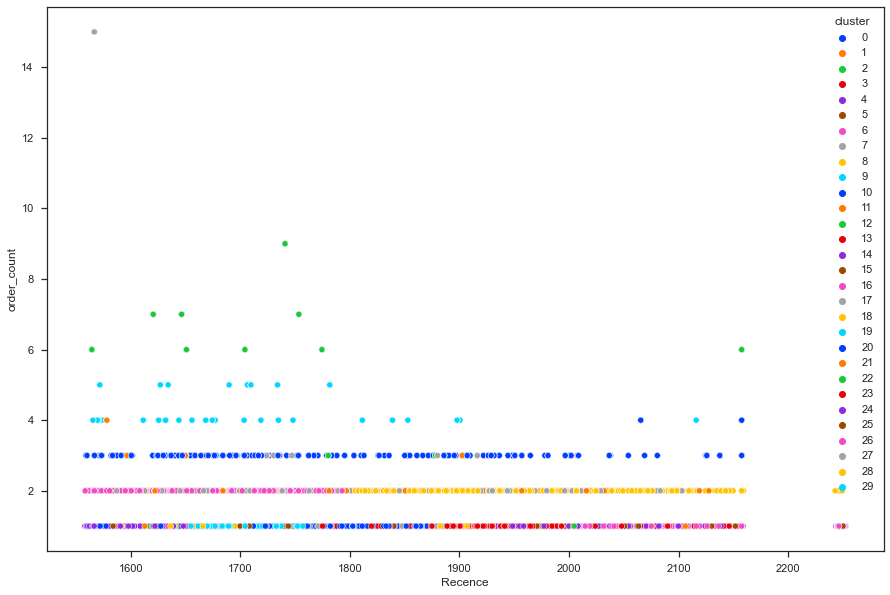

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))

palette = sns.color_palette(["#0000FF","#FF7F00","#FF0000","#00FF00"])

sns.scatterplot( data=RFM_ML, x='Recence', y='order_count',hue= 'cluster',palette= 'bright')

' Rouge :  #FF0000\n    Orange : #FF7F00\n    Jaune : #FFFF00\n    Vert : #00FF00\n    Bleu : #0000FF\n    Violet : #8B00FF '

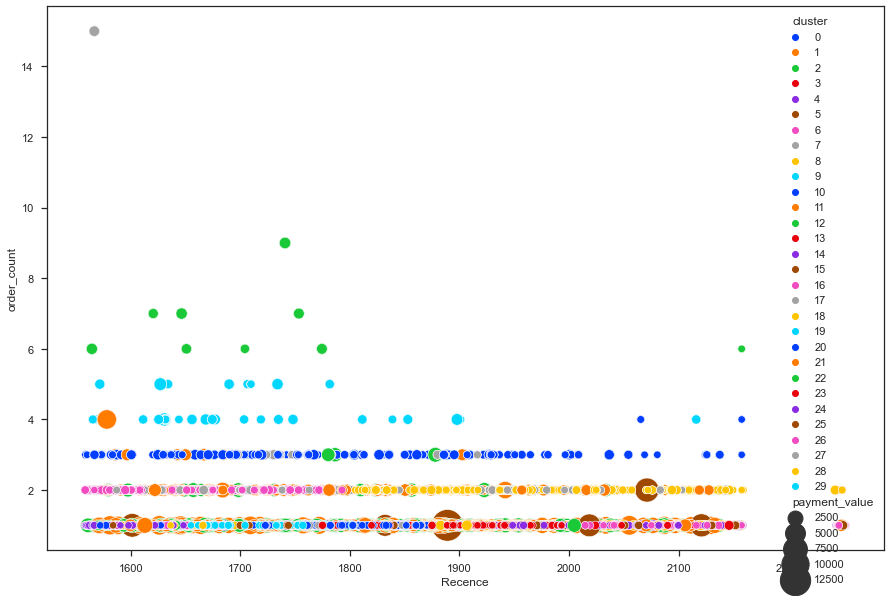

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
#palette = sns.color_palette(["#0000FF","#FF7F00","#FF0000","#00FF00"]) #,"#ffc400" bleu : "#023eff" ,"#023eff"
sns.scatterplot( data=RFM_ML, x='Recence', y='order_count',hue= 'cluster',size='payment_value',
                sizes=(50, 1000), palette= 'bright')
""" Rouge :  #FF0000
    Orange : #FF7F00
    Jaune : #FFFF00
    Vert : #00FF00
    Bleu : #0000FF
    Violet : #8B00FF """ 

In [ ]:
# Nous observons 4 clusters : 
# cluster 1 en orange les grosses commandes 
# cluster 0 bleu clients avec une seule commande récente : moins de 1800 jours
# cluster 2 en vert les clients avec une seule commande plus de 1800 jours
# cluster 3 en rouge les clients ayant passé plusieurs commandes 


<AxesSubplot:xlabel='Recence', ylabel='cluster'>

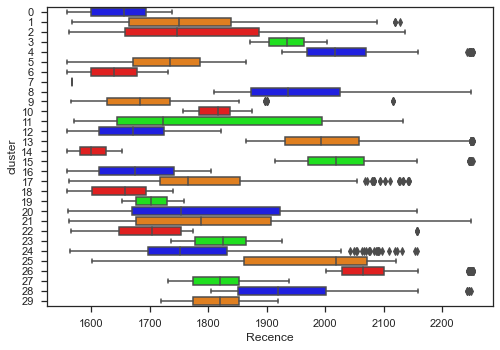

In [ ]:
sns.set_theme(style="ticks", palette= 'bright')


sns.boxplot(x="Recence", y="cluster",orient = 'h', data=RFM_ML, palette = palette)


<AxesSubplot:xlabel='payment_value', ylabel='cluster'>

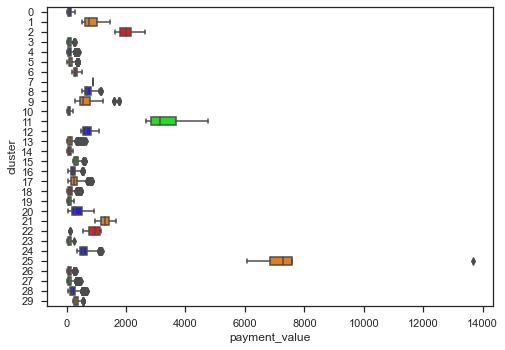

In [ ]:
sns.boxplot(x="payment_value", y="cluster",orient = 'h', data=RFM_ML, palette = palette)

<AxesSubplot:xlabel='order_count', ylabel='cluster'>

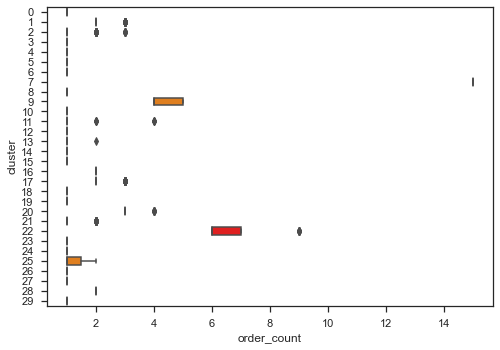

In [ ]:
sns.boxplot(x="order_count", y="cluster",orient = 'h', data=RFM_ML, palette = palette)

# Visualisation des clusters et analyse DBscan

In [ ]:
X= RFM[['payment_value','order_count','Recence']]

In [ ]:
scaler = StandardScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

In [ ]:
preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

In [ ]:
debut = time.time()

for eps in range(5, 11, 1) :
    for min_samples in [250,500,1000,2000] :

        dbscan = Pipeline([
            ("preprocessor", preprocessor),
            ("DBscan", DBSCAN(min_samples = min_samples ,eps= eps/10).fit(X))])
        
        y_dbscan = dbscan.fit_predict(X)
        print("EPS",eps/10,'min_sample',min_samples,"Silhouette  %0.3f" % metrics.silhouette_score(X, y_dbscan))
        
print ( time.time() - debut ,' secondes')

EPS 0.1 min_sample 250 Silhouette  0.423
EPS 0.1 min_sample 500 Silhouette  0.351
EPS 0.1 min_sample 1000 Silhouette  0.212
EPS 0.1 min_sample 2000 Silhouette  -0.244
EPS 0.2 min_sample 250 Silhouette  -0.215
EPS 0.2 min_sample 500 Silhouette  0.473
EPS 0.2 min_sample 1000 Silhouette  0.441
EPS 0.2 min_sample 2000 Silhouette  0.379
EPS 0.3 min_sample 250 Silhouette  -0.034
EPS 0.3 min_sample 500 Silhouette  -0.206
EPS 0.3 min_sample 1000 Silhouette  0.485
EPS 0.3 min_sample 2000 Silhouette  0.462
EPS 0.4 min_sample 250 Silhouette  0.028
EPS 0.4 min_sample 500 Silhouette  -0.047
EPS 0.4 min_sample 1000 Silhouette  0.498
EPS 0.4 min_sample 2000 Silhouette  0.488
EPS 0.5 min_sample 250 Silhouette  -0.101
EPS 0.5 min_sample 500 Silhouette  -0.176
EPS 0.5 min_sample 1000 Silhouette  -0.122
EPS 0.5 min_sample 2000 Silhouette  -0.186
EPS 0.6 min_sample 250 Silhouette  -0.204
EPS 0.6 min_sample 500 Silhouette  -0.109
EPS 0.6 min_sample 1000 Silhouette  -0.202
EPS 0.6 min_sample 2000 Silhouette  -0.137
EPS 0.7 min_sample 250 Silhouette  -0.113
EPS 0.7 min_sample 500 Silhouette  -0.093
EPS 0.7 min_sample 1000 Silhouette  -0.168
EPS 0.7 min_sample 2000 Silhouette  -0.100
EPS 0.8 min_sample 250 Silhouette  -0.095
EPS 0.8 min_sample 500 Silhouette  -0.089
EPS 0.8 min_sample 1000 Silhouette  -0.108
EPS 0.8 min_sample 2000 Silhouette  -0.088
EPS 0.9 min_sample 250 Silhouette  -0.087
EPS 0.9 min_sample 500 Silhouette  -0.082
EPS 0.9 min_sample 1000 Silhouette  -0.090
EPS 0.9 min_sample 2000 Silhouette  -0.084
EPS 1.0 min_sample 250 Silhouette  -0.081
EPS 1.0 min_sample 500 Silhouette  0.043
EPS 1.0 min_sample 1000 Silhouette  0.027
EPS 1.0 min_sample 2000 Silhouette  -0.066
4429.448323726654  secondes


In [ ]:
debut = time.time()

dbscan = Pipeline([
            ("preprocessor", preprocessor),
            ("DBscan", DBSCAN(min_samples = 1000 ,eps= 0.4).fit(X))])

y_dbscan = dbscan.fit_predict(X)
print ( time.time() - debut ,' secondes')
y_dbscan

24.14172887802124  secondes


array([ 0,  1, -1, ...,  0,  0,  0], dtype=int64)

In [ ]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_dbscan))

Silhouette Coefficient: -0.164


In [ ]:
RFM_ML=RFM
RFM_ML['cluster']=y_dbscan

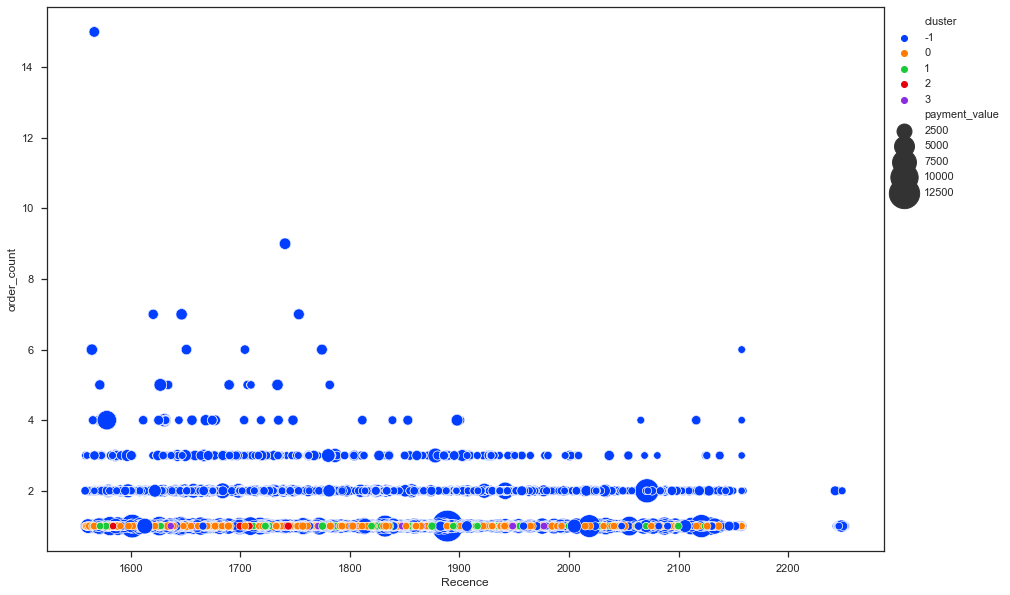

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))

ax = sns.scatterplot( data=RFM_ML, x='Recence', y='order_count',hue= 'cluster',size='payment_value',
                sizes=(50, 1000), palette= 'bright')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
RFM_ML.groupby('cluster').count()

,Unnamed: 0,customer_unique_id,payment_value,first_order,last_order,Duration,Recence_date,Recence,order_count,review_id,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
cluster,,,,,,,,,,,,,,,,,,,,,
-1,22491,22491,22491,22491,22491,22491,22491,22491,22491,22491,...,22491,22491,22491,22491,22491,22491,22491,22491,22491,22491
0,48363,48363,48363,48363,48363,48363,48363,48363,48363,48363,...,48363,48363,48363,48363,48363,48363,48363,48363,48363,48363
1,15208,15208,15208,15208,15208,15208,15208,15208,15208,15208,...,15208,15208,15208,15208,15208,15208,15208,15208,15208,15208
2,5913,5913,5913,5913,5913,5913,5913,5913,5913,5913,...,5913,5913,5913,5913,5913,5913,5913,5913,5913,5913
3,4583,4583,4583,4583,4583,4583,4583,4583,4583,4583,...,4583,4583,4583,4583,4583,4583,4583,4583,4583,4583


<AxesSubplot:xlabel='Recence', ylabel='cluster'>

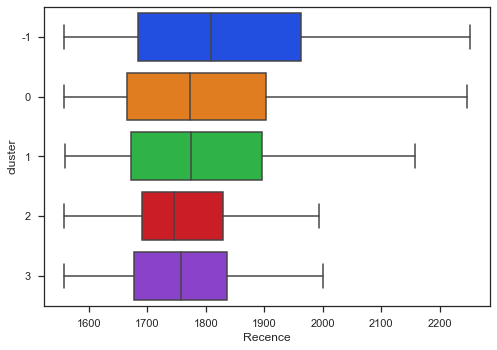

In [ ]:
sns.boxplot(x="Recence", y="cluster",orient = 'h', data=RFM_ML)

<AxesSubplot:xlabel='payment_value', ylabel='cluster'>

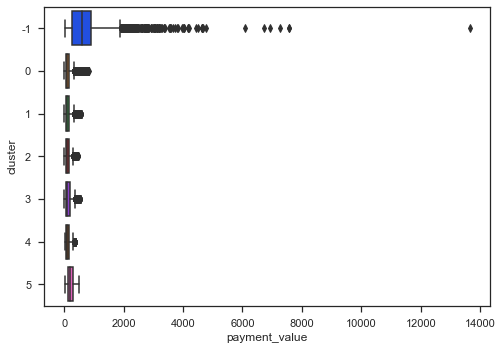

In [ ]:
sns.boxplot(x="payment_value", y="cluster",orient = 'h', data=RFM_ML)

<AxesSubplot:xlabel='order_count', ylabel='cluster'>

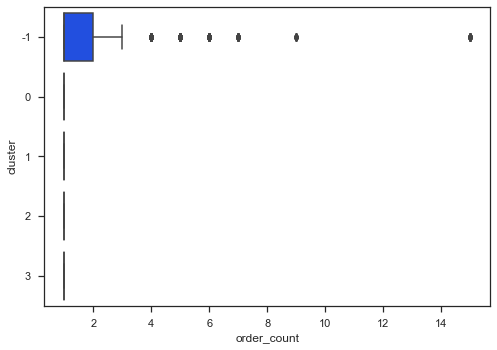

In [ ]:
sns.boxplot(x="order_count", y="cluster",orient = 'h', data=RFM_ML)

In [ ]:
RFM_ML[['Recence','order_count','payment_value','cluster']].groupby('cluster').describe().transpose()

cluster                        -1             0             1            2  \
Recence       count  22491.000000  48363.000000  15208.000000  5913.000000   
              mean    1824.195698   1789.805668   1792.099276  1753.491055   
              std      168.492713    152.641902    147.734435    96.041295   
              min     1558.080592   1558.053289   1558.549666  1558.161032   
              25%     1684.072739   1664.509244   1672.029528  1690.650581   
              50%     1808.133845   1773.226553   1775.052300  1745.887930   
              75%     1963.043376   1902.534238   1895.543301  1829.163659   
              max     2252.280303   2246.017028   2157.785997  1994.334782   
order_count   count  22491.000000  48363.000000  15208.000000  5913.000000   
              mean       1.348095      1.000000      1.000000     1.000000   
              std        0.744201      0.000000      0.000000     0.000000   
              min        1.000000      1.000000      1.000000     1.000000   
              25%        1.000000      1.000000      1.000000     1.000000   
              50%        1.000000      1.000000      1.000000     1.000000   
              75%        2.000000      1.000000      1.000000     1.000000   
              max       15.000000      1.000000      1.000000     1.000000   
payment_value count  22491.000000  48363.000000  15208.000000  5913.000000   
              mean     384.337427    110.873401     99.933401   103.936144   
              std      400.491739     67.823504     54.226506    52.245864   
              min       14.290000      9.590000     12.280000    13.890000   
              25%      161.200000     57.590000     55.995000    61.870000   
              50%      290.370000     94.400000     88.750000    95.520000   
              75%      451.910000    149.885000    136.545000   141.670000   
              max    13664.080000    347.520000    258.230000   236.970000   

cluster                        3  
Recence       count  4583.000000  
              mean   1760.061182  
              std     108.316794  
              min    1558.056808  
              25%    1676.586368  
              50%    1756.888451  
              75%    1835.679429  
              max    2000.515257  
order_count   count  4583.000000  
              mean      1.000000  
              std       0.000000  
              min       1.000000  
              25%       1.000000  
              50%       1.000000  
              75%       1.000000  
              max       1.000000  
payment_value count  4583.000000  
              mean     83.469662  
              std      39.760308  
              min      10.890000  
              25%      50.390000  
              50%      76.080000  
              75%     112.710000  
              max     183.840000

# RFM + Review : Analyse KMeans

In [ ]:


RFMR_ML=RFM[['Recence','order_count','payment_value','review_score']][RFM['last_order']<"31/12/2016"]
X = RFMR_ML
X.describe()

,Recence,order_count,payment_value,review_score
count,96558.000000,96558.000000,96558.000000,96558.000000
mean,1794.541682,1.081081,171.122086,4.151826
std,152.374379,0.388135,232.840350,1.288738
min,1558.053289,1.000000,9.590000,1.000000
25%,1671.206258,1.000000,64.100000,4.000000
50%,1775.575494,1.000000,111.320000,5.000000
75%,1902.539131,1.000000,189.070000,5.000000
max,2252.280303,15.000000,13664.080000,5.000000


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Recence', 'order_count',
                                                   'payment_value',
                                                   'review_score'])])),
                ('kelbowvisualizer',
                 KElbowVisualizer(ax=<AxesSubplot:>,
                                  estimator=KMeans(n_clusters=10,
                                                   random_state=22)))])

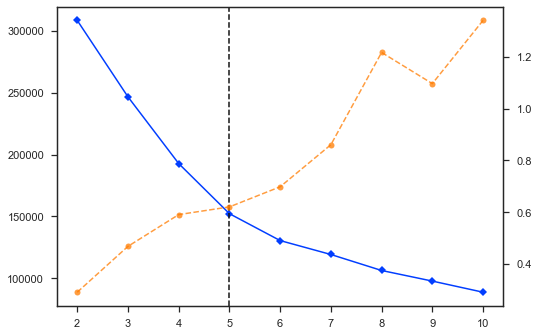

In [ ]:
debut = time.time() 

scaler = StandardScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])
debut = time.time()
kmeans_visualizer.fit(X)

In [ ]:
debut = time.time()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()
preprocessor = ColumnTransformer([('scaler', StandardScaler(), numerical_features)])
kmeans = Pipeline([
    ("preprocessor", preprocessor),
    ("Kmeans", KMeans(n_clusters=5, init='k-means++', random_state=22).fit(X))])

print ( time.time() - debut ,' secondes')

0.9287464618682861  secondes


In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
dump(y_kmeans, 'RFM_score.joblib') 

['RFM_score.joblib']

In [ ]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans))

Silhouette Coefficient: 0.152


In [ ]:
RFMR_ML=RFM[['Recence','order_count','payment_value','review_score']]

In [ ]:
RFMR_ML['cluster']=y_kmeans

C:\Users\Hugues\AppData\Local\Temp\ipykernel_10448\1149536037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFMR_ML['cluster']=y_kmeans


In [ ]:
RFMR_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96558 entries, 0 to 96557
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recence        96558 non-null  float64
 1   order_count    96558 non-null  int64  
 2   payment_value  96558 non-null  float64
 3   review_score   96558 non-null  int64  
 4   cluster        96558 non-null  int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 3.3 MB


In [ ]:
RFMR_ML.groupby(['cluster']).sum()

,Recence,order_count,payment_value,review_score
cluster,,,,
0,6.945732e+07,41348,5520207.54,194158
1,6.144115e+07,31500,4248363.47,146103
2,2.849820e+07,16318,2447206.29,26837
3,3.614622e+06,2216,2621241.93,8225
4,1.026607e+07,13005,1686187.18,25569


In [ ]:
RFMR_ML.groupby(['cluster']).describe(include='all').transpose() 

cluster                         0             1             2             3  \
Recence       count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean    1679.822865   1950.512756   1789.863143   1788.531473   
              std       73.090178     95.051179    126.710029    150.775172   
              min     1558.053289   1812.742664   1558.161032   1561.053428   
              25%     1615.658370   1866.596252   1707.036446   1664.482305   
              50%     1676.992444   1940.570540   1770.071067   1766.188694   
              75%     1742.766298   2022.241339   1847.076290   1898.734007   
              max     1816.315974   2252.280303   2252.250974   2250.024690   
order_count   count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean       1.000000      1.000000      1.024871      1.096487   
              std        0.000000      0.000000      0.155738      0.346257   
              min        1.000000      1.000000      1.000000      1.000000   
              25%        1.000000      1.000000      1.000000      1.000000   
              50%        1.000000      1.000000      1.000000      1.000000   
              75%        1.000000      1.000000      1.000000      1.000000   
              max        1.000000      1.000000      2.000000      4.000000   
payment_value count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean     133.506035    134.868682    153.699679   1297.002439   
              std      110.426950    115.009040    129.131400    716.095898   
              min        9.590000     10.070000     13.780000    707.160000   
              25%       59.430000     60.727500     66.675000    879.440000   
              50%      102.070000    100.330000    114.625000   1076.760000   
              75%      167.740000    165.755000    192.972500   1447.020000   
              max      758.320000    818.120000    854.330000  13664.080000   
review_score  count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean       4.695705      4.638190      1.685529      4.069767   
              std        0.528606      0.589533      0.855286      1.373217   
              min        3.000000      2.000000      1.000000      1.000000   
              25%        4.000000      4.000000      1.000000      4.000000   
              50%        5.000000      5.000000      1.000000      5.000000   
              75%        5.000000      5.000000      3.000000      5.000000   
              max        5.000000      5.000000      3.000000      5.000000   

cluster                        4  
Recence       count  5767.000000  
              mean   1780.139593  
              std     145.920683  
              min    1558.331125  
              25%    1662.591518  
              50%    1758.772004  
              75%    1882.079175  
              max    2249.175940  
order_count   count  5767.000000  
              mean      2.255072  
              std       0.971301  
              min       2.000000  
              25%       2.000000  
              50%       2.000000  
              75%       2.000000  
              max      15.000000  
payment_value count  5767.000000  
              mean    292.385500  
              std     212.867769  
              min      35.940000  
              25%     147.730000  
              50%     226.600000  
              75%     370.255000  
              max    1760.750000  
review_score  count  5767.000000  
              mean      4.433674  
              std       0.968493  
              min       1.000000  
              25%       4.000000  
              50%       5.000000  
              75%       5.000000  
              max       5.000000

<AxesSubplot:xlabel='order_count', ylabel='payment_value'>

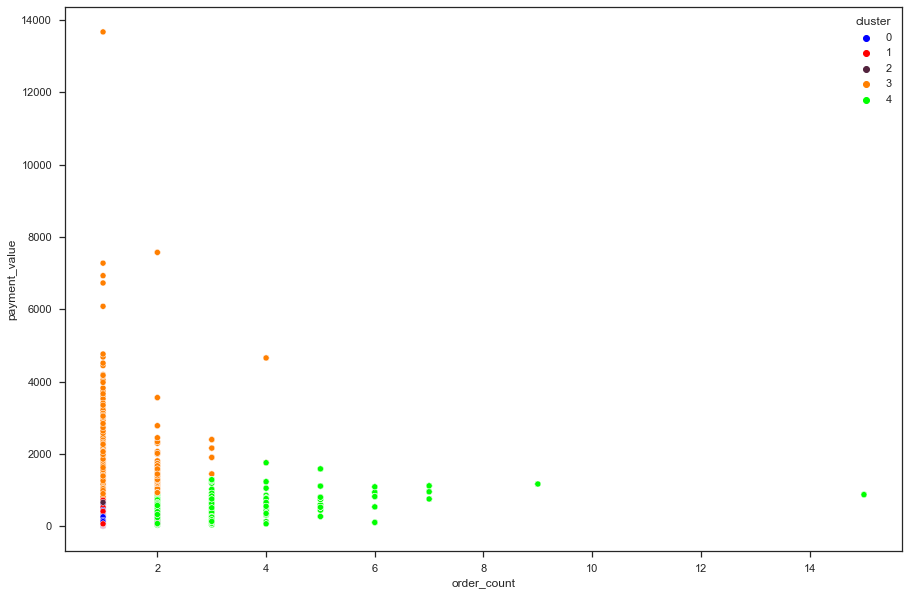

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
#palette = sns.color_palette(["#0000FF","#FF7F00","#FF0000","#00FF00","#DDA0DD"])
palette = sns.color_palette(["#0000FF","#FF0000","#52233d","#FF7F00","#00FF00"])
sns.scatterplot(data=RFMR_ML, x='order_count', y='payment_value', hue= 'cluster',palette= palette)

<AxesSubplot:xlabel='Recence', ylabel='payment_value'>

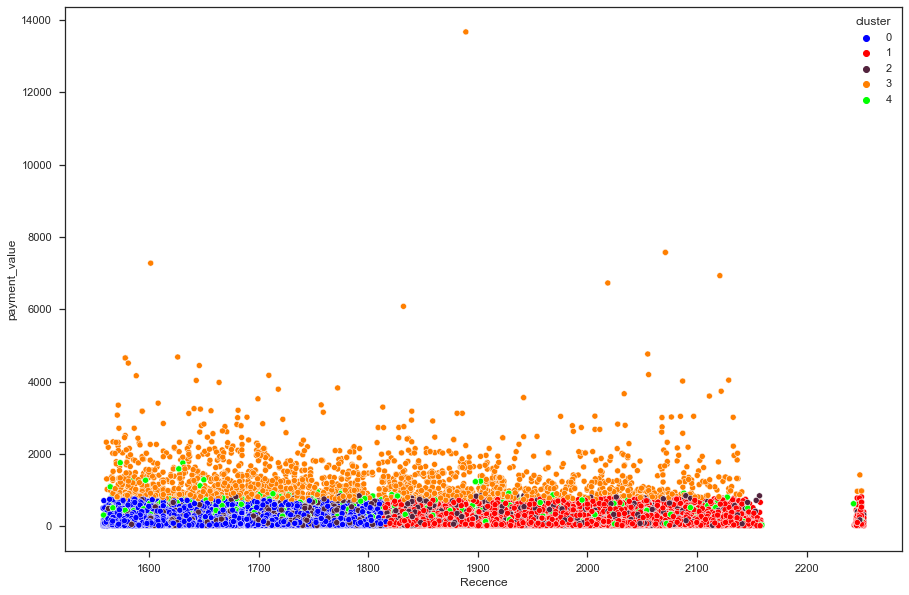

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
sns.scatterplot( data=RFMR_ML, x='Recence', y='payment_value',hue= 'cluster',palette= palette)

<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

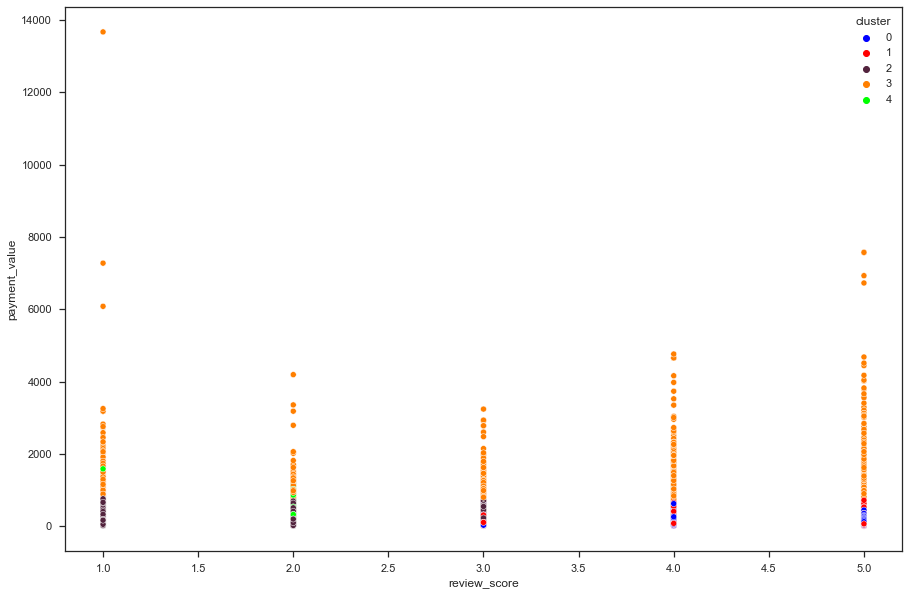

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))
sns.scatterplot( data=RFMR_ML, x='review_score', y='payment_value',hue= 'cluster',palette= palette)

<AxesSubplot:xlabel='Recence', ylabel='order_count'>

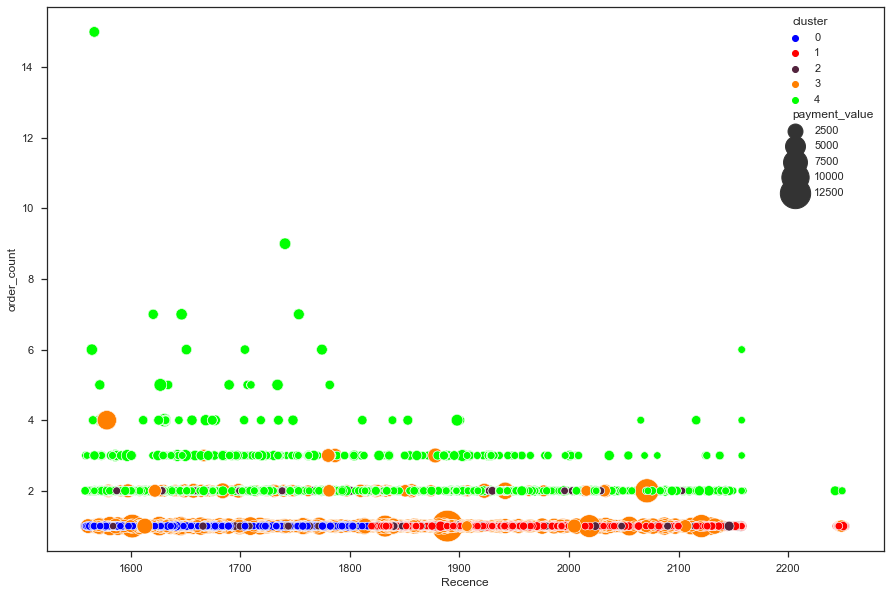

In [ ]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))

sns.scatterplot( data=RFMR_ML, x='Recence', y='order_count',hue= 'cluster',size='payment_value',
                sizes=(50, 1000), palette= palette)

<AxesSubplot:xlabel='review_score', ylabel='cluster'>

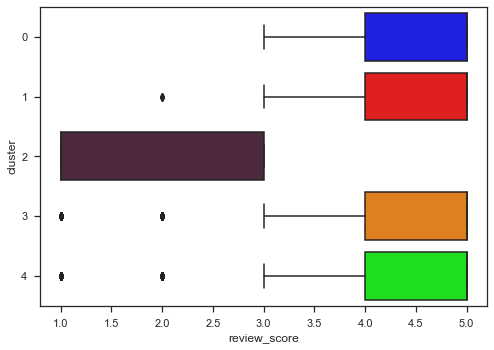

In [ ]:
sns.set_theme(style="ticks", palette= 'bright')
sns.boxplot(x="review_score", y="cluster",orient = 'h', data=RFMR_ML, palette= palette)

Le cluster 2 (en vert) regroupe les avis plutot négatif inférieur à 3 : Client déçus

<AxesSubplot:xlabel='order_count', ylabel='cluster'>

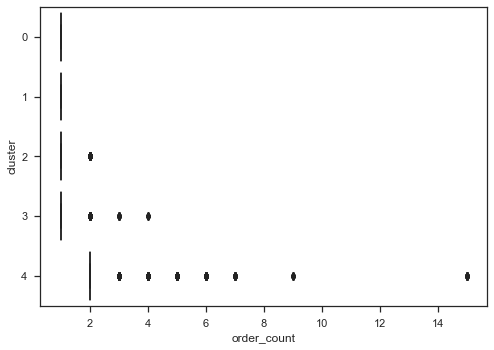

In [ ]:
sns.boxplot(x="order_count", y="cluster",orient = 'h', data=RFMR_ML, palette= palette)

Peu de différence visible entre les clusters, le 4 regroupe les clients ayant commandé le plus 

<AxesSubplot:xlabel='payment_value', ylabel='cluster'>

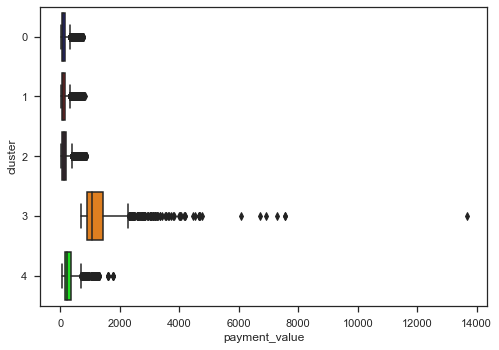

In [ ]:
sns.boxplot(x="payment_value", y="cluster",orient = 'h', data=RFMR_ML, palette= palette)

Le cluster 0 regroupe les clients ayant les plus important montants commandés : Star 

<AxesSubplot:xlabel='Recence', ylabel='cluster'>

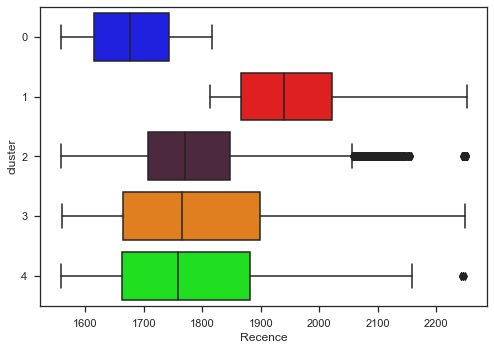

In [ ]:
sns.boxplot(x="Recence", y="cluster",orient = 'h', data=RFMR_ML, palette= palette)

Le cluster 0 regroupe les commandes les plus récentes moins de 1800 jours : client actif 
Le cluster 1 les commandes  plus de 1800 jours : client inactif

In [ ]:
ana=RFMR_ML.groupby(['cluster'])

In [ ]:
ana.mean()

,Recence,order_count,payment_value,review_score
cluster,,,,
0,1679.822865,1.000000,133.506035,4.695705
1,1950.512756,1.000000,134.868682,4.638190
2,1789.863143,1.024871,153.699679,1.685529
3,1788.531473,1.096487,1297.002439,4.069767
4,1780.139593,2.255072,292.385500,4.433674


In [ ]:
ana.median()

,Recence,order_count,payment_value,review_score
cluster,,,,
0,1676.992444,1.0,102.070,5.0
1,1940.570540,1.0,100.330,5.0
2,1770.071067,1.0,114.625,1.0
3,1766.188694,1.0,1076.760,5.0
4,1758.772004,2.0,226.600,5.0


In [ ]:
ana.describe(include='all').transpose() 

cluster                         0             1             2             3  \
Recence       count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean    1679.822865   1950.512756   1789.863143   1788.531473   
              std       73.090178     95.051179    126.710029    150.775172   
              min     1558.053289   1812.742664   1558.161032   1561.053428   
              25%     1615.658370   1866.596252   1707.036446   1664.482305   
              50%     1676.992444   1940.570540   1770.071067   1766.188694   
              75%     1742.766298   2022.241339   1847.076290   1898.734007   
              max     1816.315974   2252.280303   2252.250974   2250.024690   
order_count   count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean       1.000000      1.000000      1.024871      1.096487   
              std        0.000000      0.000000      0.155738      0.346257   
              min        1.000000      1.000000      1.000000      1.000000   
              25%        1.000000      1.000000      1.000000      1.000000   
              50%        1.000000      1.000000      1.000000      1.000000   
              75%        1.000000      1.000000      1.000000      1.000000   
              max        1.000000      1.000000      2.000000      4.000000   
payment_value count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean     133.506035    134.868682    153.699679   1297.002439   
              std      110.426950    115.009040    129.131400    716.095898   
              min        9.590000     10.070000     13.780000    707.160000   
              25%       59.430000     60.727500     66.675000    879.440000   
              50%      102.070000    100.330000    114.625000   1076.760000   
              75%      167.740000    165.755000    192.972500   1447.020000   
              max      758.320000    818.120000    854.330000  13664.080000   
review_score  count  41348.000000  31500.000000  15922.000000   2021.000000   
              mean       4.695705      4.638190      1.685529      4.069767   
              std        0.528606      0.589533      0.855286      1.373217   
              min        3.000000      2.000000      1.000000      1.000000   
              25%        4.000000      4.000000      1.000000      4.000000   
              50%        5.000000      5.000000      1.000000      5.000000   
              75%        5.000000      5.000000      3.000000      5.000000   
              max        5.000000      5.000000      3.000000      5.000000   

cluster                        4  
Recence       count  5767.000000  
              mean   1780.139593  
              std     145.920683  
              min    1558.331125  
              25%    1662.591518  
              50%    1758.772004  
              75%    1882.079175  
              max    2249.175940  
order_count   count  5767.000000  
              mean      2.255072  
              std       0.971301  
              min       2.000000  
              25%       2.000000  
              50%       2.000000  
              75%       2.000000  
              max      15.000000  
payment_value count  5767.000000  
              mean    292.385500  
              std     212.867769  
              min      35.940000  
              25%     147.730000  
              50%     226.600000  
              75%     370.255000  
              max    1760.750000  
review_score  count  5767.000000  
              mean      4.433674  
              std       0.968493  
              min       1.000000  
              25%       4.000000  
              50%       5.000000  
              75%       5.000000  
              max       5.000000